<a href="https://colab.research.google.com/github/mmuucha/ML-01/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression model but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables... even shorter ... predicitng a number (also neural network definitions)

In [125]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.0


## Creating some data to view and fit

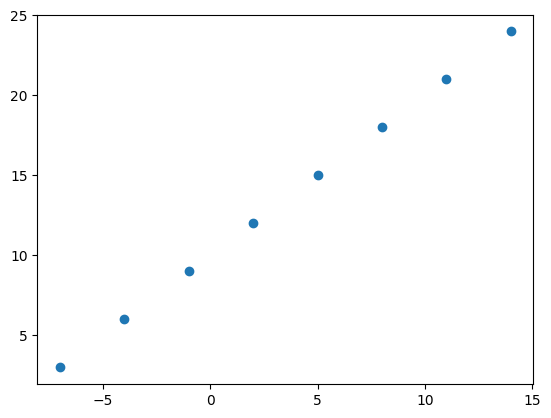

In [126]:
import numpy as np
import matplotlib.pyplot as plt
# Create the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [127]:
#y == X + 10
# X + 10 is the pattern

## Input and output shapes

In [128]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [129]:
X[0], y[0]

(-7.0, 3.0)

In [130]:
X[1], y[1]

(-4.0, 6.0)

In [131]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [132]:
X[0].ndim

0

In [133]:
X[0],y[0]

(-7.0, 3.0)

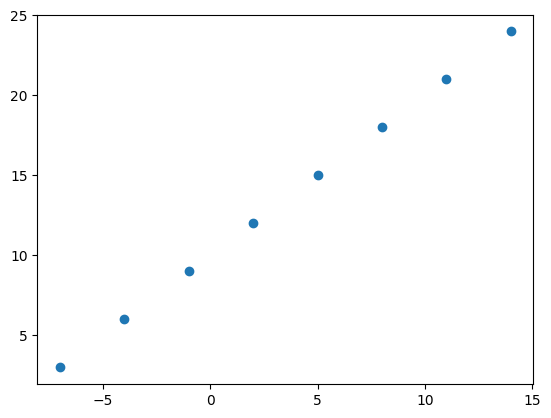

In [134]:
# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);




In [135]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

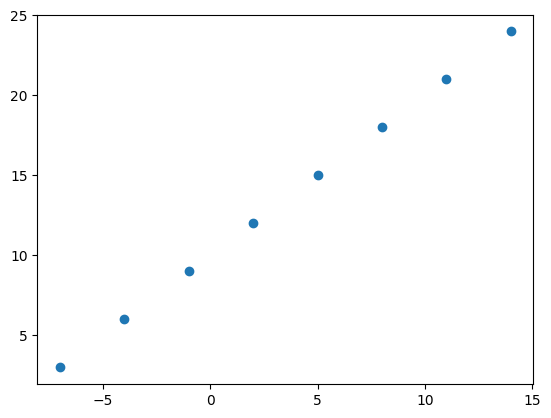

In [136]:
plt.scatter(X,y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define input and output layers, as well as hidden lays of deep learning model.
2. **Compiling a model** - define the loss function (in other words, the funciton which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try and find patterns between X & y (features and labels)

In [137]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])


# 3. Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - loss: 17.5621 - mae: 17.5621
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 17.2809 - mae: 17.2809
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 16.9996 - mae: 16.9996
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 16.7184 - mae: 16.7184
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 16.4371 - mae: 16.4371


In [138]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [139]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[-11.082089]], dtype=float32)

In [140]:
y_pred + 11

array([[-0.08208942]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a mode** - here we might change the optimization function or perhaps the **Learning Rate** of the optimization function
3. **Fitting the Model** - here we might fit the model for more **Epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [141]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])


# 3. Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step - loss: 15.9356 - mae: 15.9356
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 15.6544 - mae: 15.6544
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 15.3731 - mae: 15.3731
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 15.0919 - mae: 15.0919
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 14.8588 - mae: 14.8588
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 14.7263 - mae: 14.7263
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 14.5938 - mae: 14.5938
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 14.4613 - mae: 14.4613
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 14.3288 - mae: 14.3288
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 14.1963 - mae: 14.1963
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 14.0638 - mae: 14.0638
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 13.9313 - mae: 13.9313
Epoch 13/100
1/1 ━━━━━━━

In [142]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [143]:
# Lets see if our models prediction has improved
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[29.85458]], dtype=float32)

In [147]:
# Lets see if we can make another change to improve the model

# 1. Create the model (this time wkith an extra hidden lays with 100 hiden units)

modelA = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
modelA.compile(loss = "mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
#modelA.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


In [148]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [150]:
#modelA.predict(np.array([17.0]))
#LEARNING RATE IS THE MOST IMPORANT hyper parameter of many different neural networks!!!

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```


When it comes to evaluation.. there are 3 words you should memorize:
> "Visualize, visualize, visualize"

Its a good idea to visualize:
* The data - what data are we working with, what does it look like ?
* The model itself - what does our model look like?
* The training of the model -  how does a model perform while it learns?
* The predictions - how do the predictions of a model line up against the ground truth (the orignal labels)


In [152]:
# Make a bigger data set
X = tf.range(-100, 100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [153]:
# Make labels for dataset
y = X + 10 # pattern we want model t learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

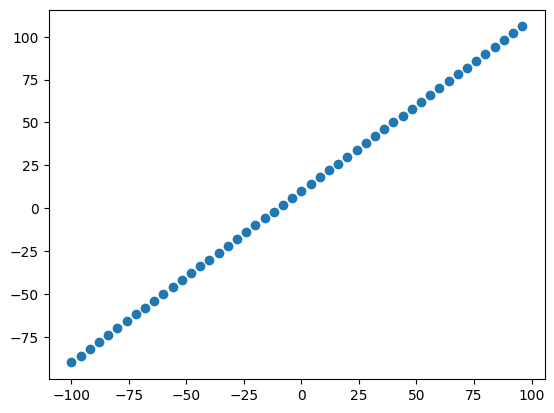

In [154]:
# Visulize the data
plt.scatter(X,y)

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80 percent of the total data avaiable.
*Validation set - model gets tuned on this data, which is typically 10-15% of the data avbailable.
*Test set - model gets evaluated on this data to test what is has learned, this set is typcially 10-15% of the total data available.

In [155]:
# Check length of how many samples we have
len(X)

50

In [156]:
# Skip valiation set

In [157]:
# Split the data into train and test sets
X_train = X[:40] # first 40 trainng samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of data)
y_test = y[40:]

len(X_train), len(X_test),len(y_train), len(y_test)

(40, 10, 40, 10)

# visualize data

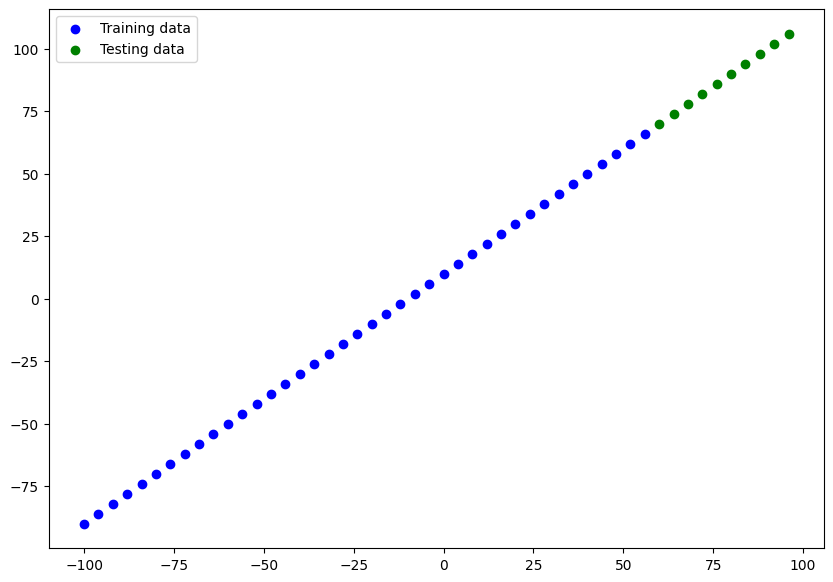

In [158]:
plt.figure(figsize=(10,7))
# Plot trianing data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [159]:
# Lets have look on how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
#model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [160]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [161]:
# lets create a model which builds automatically by defining input_shape inthe first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape= [1], name ="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],name ="model_1")

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [162]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

**Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

Total params - total number of parameters in the model.
Trainable parameters - these are the parameters (patterns) the model can update as it trains.

Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).
📖 Resource: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

🛠 Exercise: Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

For now, all you need to think about these parameters is that their learnable patterns in the data.

In [163]:
# Fit model to training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [164]:
# Get summary of model
model.summary()


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

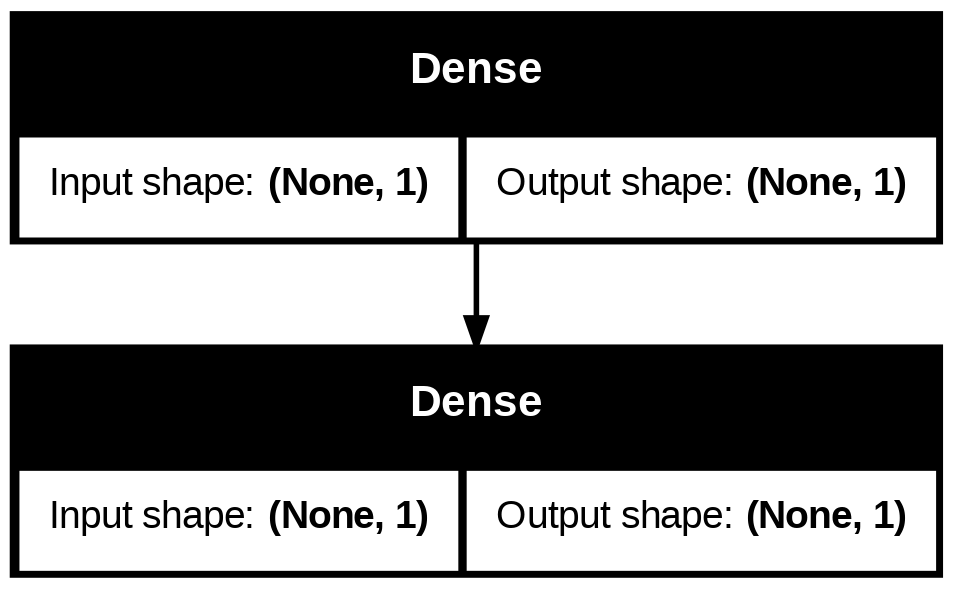

In [165]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)


### Visualizing our models predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [166]:
# Make some predictions
y_preds = model.predict(X_test)
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[34.929554],
       [37.152332],
       [39.375107],
       [41.59788 ],
       [43.82066 ],
       [46.043434],
       [48.26621 ],
       [50.488987],
       [52.71176 ],
       [54.93454 ]], dtype=float32)

In [167]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

KEY note: python concept: if you feel like youre going to reuse some kind of functionality its a good idea to turn it into a funciton

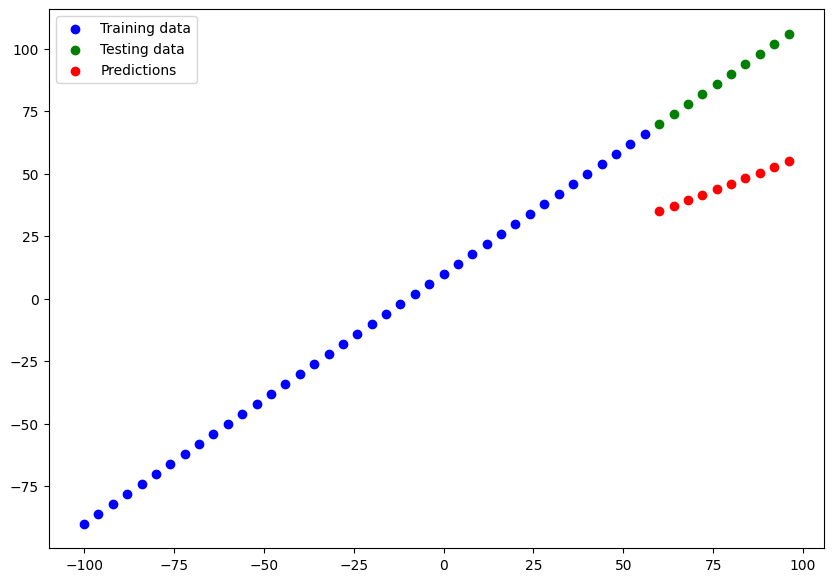

In [174]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

### Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

Mean absolute error (MAE) - the mean difference between each of the predictions.
Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In [197]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 43.0680 - mae: 43.0680


[43.067955017089844, 43.067955017089844]

In [198]:
# Calculate the mean absolute error
mae = tf.metrics.mae(y_true=y_test,
                                     y_pred=tf.constant(y_preds))
mae


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([35.070446, 36.847668, 38.624893, 40.40212 , 42.17934 , 43.956566,
       45.73379 , 47.511013, 49.28824 , 51.06546 ], dtype=float32)>

In [199]:
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[34.929554],
       [37.152332],
       [39.375107],
       [41.59788 ],
       [43.82066 ],
       [46.043434],
       [48.26621 ],
       [50.488987],
       [52.71176 ],
       [54.93454 ]], dtype=float32)>

In [200]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [201]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.929554, 37.152332, 39.375107, 41.59788 , 43.82066 , 46.043434,
       48.26621 , 50.488987, 52.71176 , 54.93454 ], dtype=float32)>

In [205]:
# calculate mae

mae = tf.metrics.mae(y_true=y_test,
                     y_pred=tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=43.067955>

In [207]:
# Calculate MSE
mse = tf.metrics.mse(y_true=y_test,
                     y_pred=tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1880.9065>

In [216]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_preds):
  return tf.metrics.mae(y_true=y_true,
                        y_pred=tf.squeeze(y_preds))

def mse(y_true,y_preds):
  return tf.metrics.mse(y_true=y_true,
                        y_pred=tf.squeeze(y_preds))

### Running experiments to improve our model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

Get more data - get more examples for your model to train on (more opportunities to learn patterns).

Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.

Train for longer - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.

model_2 - 2 layers, trained for 100 epochs.

model_3 - 2 layers, trained for 500 epochs.



In [209]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [211]:
# Build Model 1
tf.random.set_seed(42)

# 1. Create Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the Model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 25.3204 - mae: 25.3204
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.8387 - mae: 7.8387 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.7538 - mae: 11.7538
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.6929 - mae: 8.6929 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.1617 - mae: 10.1617 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.8994 - mae: 11.8994 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.8027 - mae: 8.8027 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.2714 - mae: 10.2714  
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.0693 - mae: 12.0693
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.5341 - mae: 12.5341
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9705 - mae: 7.9705 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.6886 - mae: 9.6886
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


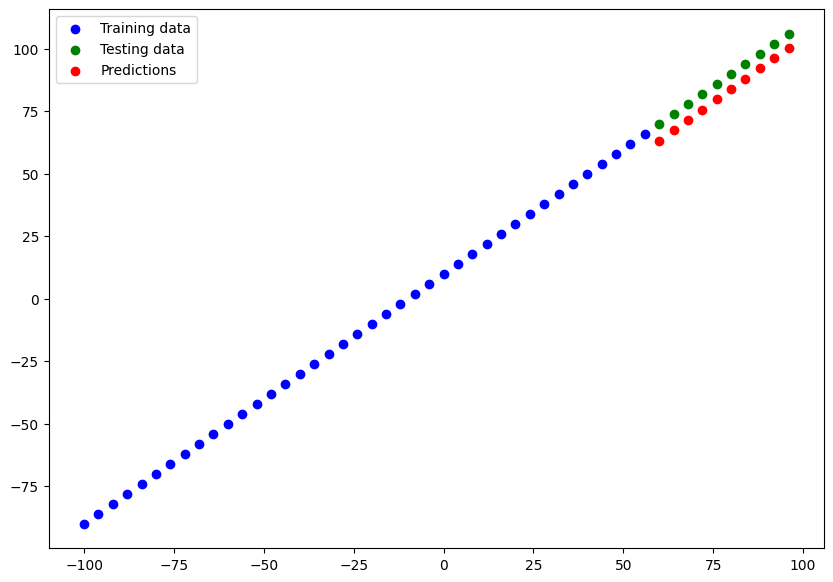

In [212]:
# Make and plot predictions for model 1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [217]:
# Calculte model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=6.161835>,
 <tf.Tensor: shape=(), dtype=float32, numpy=38.095146>)

In [248]:
 #Model 2

# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


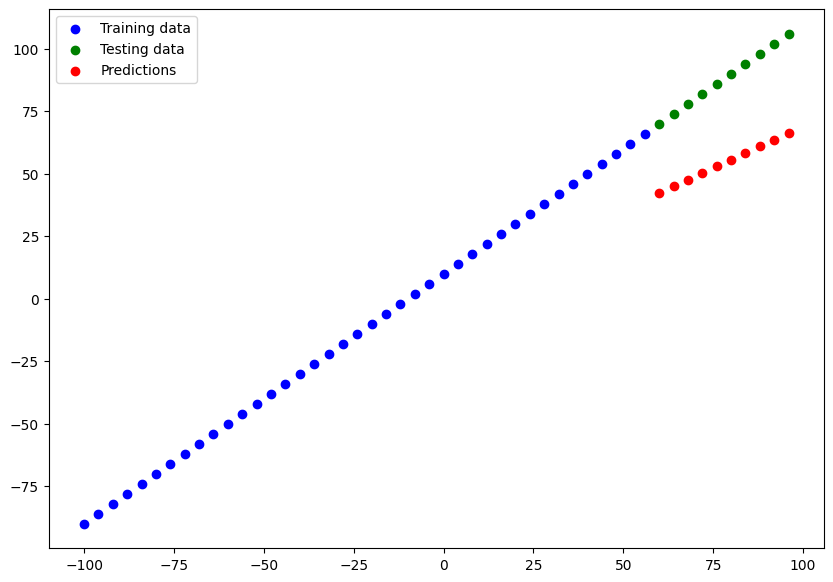

In [249]:

# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [250]:
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=33.70046>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1150.0618>)

In [237]:
# Model 3

tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


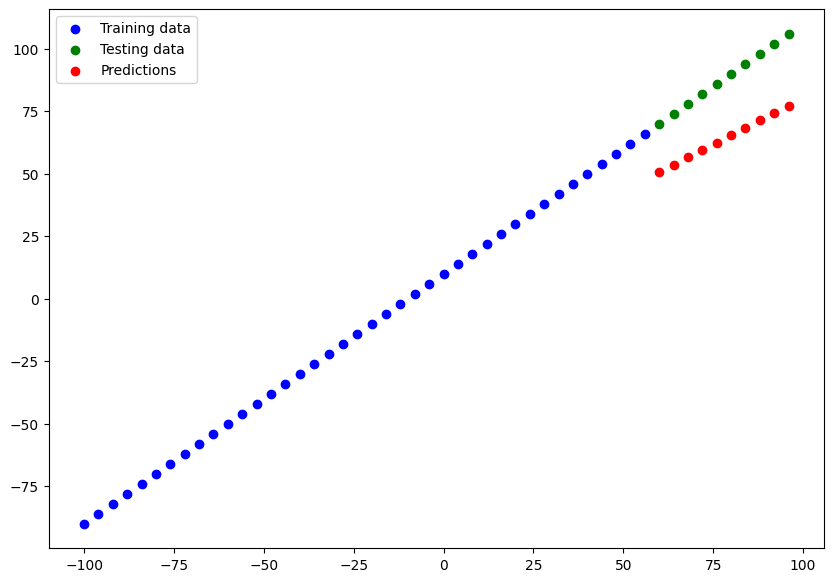

In [238]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [241]:
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=24.028595>,
 <tf.Tensor: shape=(), dtype=float32, numpy=586.6647>)

In [245]:
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mae_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,6.161835,38.095146
1,model_2,34.244686,1187.233276
2,model_3,24.028595,24.028595


In [254]:
# Model 1 preformed best but I think i did something wrong with my data
model_1.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

#And now, you might be thinking, "wow, comparing models is tedious..." and it definitely can be, we've only compared 3 models here.

But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment.

🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

Another thing you'll also find is what you thought may work (such as training a model for longer) may not always work and the exact opposite is also often the case.

In [ ]:
## Tracking your experiments